In [1]:
# pip install factor-analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41441 sha256=1cd0deb2915f629ac33a7d43e0322de1cdd0561ed291ff470e4e60722f460a5b
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\1d\d6\fd\140eadb97c2974fdf28ba4169a3d4175eda0aa0a0cc74869bf
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


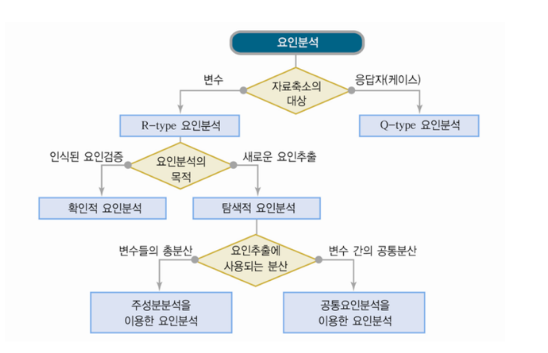

## 요인 분석(Factor Analysis)

- 중복되는 변수를 줄여보기(모형 단순화 시키고, 회원 데이터와 성혼의 연관성을 파악해보자)

`요인 분석 만족 조건`
- 사용되는 변수들이 등간척도나 비율척도로 측정한 양적 변수 여야함
- 관찰치는 서로 독립적이고 정규분포를 이루어야 하고, 변수별로 분산은 모두 동일해야함
- 응답자의 수가 최소한 변수 수의 3개 이상은 되어야 요인분석이 가능
- 입력되는 변수들 간은 어느 정도 수준의 상관관계가 있어야함

`요인분석이 가능한지 확인하는 방법`
- 바틀렛(Bartlett)테스트나 KMO(Kaiser-Meyer-Olkin) 테스트
- **바틀렛(Bartlett)테스트**
- 모집단으로부터 추출한 표본의 상관계수행렬의 행렬식 값 계산, 상관계수 행렬이 단위행렬인지 아닌지 카이제곱 분포를 이용해 검정함
- **KMO(Kaiser-Meyer-Olkin)테스트**
- 입력변수들 간의 상관계수제곱들과 편상관계수제곱들을 모두 더한 값 중에서
상관계수 제곱의 합이 차지하는 비율 값을 KMO값이라고하고,
이 값이 클수록 요인분석에 적합함(관습적으로 0.5이상일시 요인분석으로 분석하기에 적절)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
suc_data = pd.read_csv('suc_df_1768.csv')
suc_data

,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mem_last_name_code,rprsn_mov_yn,...,conts_upd_cnt,secret_item_yn,secret_yn,family_conts_upd_cnt,my_point_cont,my_hd_item_yn,my_hd_yn,ins_date,upd_date,exit_date
0,1399463,m,b,b36,1964,6,8,r,3,n,...,4,n,n,1,85.0,n,n,2020-12-14 11:21:19,2020-12-15 18:54:39,2021-01-08 15:43:15
1,1389346,m,c,c04,1994,6,2,w,44,n,...,4,n,n,0,60.0,n,n,2020-12-04 02:38:41,2020-12-23 01:49:35,2021-01-09 01:34:14
2,1331957,m,i,i01,1958,2,2,r,2,n,...,19,n,n,6,90.0,n,n,2020-10-04 23:23:56,2021-01-09 09:59:12,2021-02-12 03:50:48
3,1426495,m,f,f03,1957,2,1,r,122,y,...,0,n,n,0,88.0,n,n,2021-01-07 17:31:33,2021-01-08 20:25:27,2021-01-09 23:07:19
4,1376970,m,o,o13,1981,3,1,w,2,n,...,2,n,n,0,75.0,n,n,2020-11-21 03:03:26,2021-01-10 19:50:19,2021-01-10 19:52:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,1813612,f,a,a09,1970,2,2,r,11,n,...,0,n,n,1,80.0,n,n,2022-03-30 17:45:24,2022-03-30 20:59:00,2022-04-04 15:36:16
1764,1817350,f,o,o09,1961,6,5,r,19,n,...,0,n,n,0,97.0,n,n,2022-04-04 12:32:43,2022-04-04 12:32:43,2022-04-04 17:17:47
1765,1620891,f,b,b35,1968,7,0,r,24,n,...,1,n,n,1,85.0,n,n,2022-03-05 14:10:33,2022-04-09 16:15:32,2022-04-11 10:52:27
1766,1810847,f,b,b40,1971,1,3,r,195,n,...,5,n,n,0,51.0,n,n,2022-03-27 08:02:43,2022-04-04 19:08:16,2022-04-12 05:19:24


In [3]:
suc_data['ins_date'] = pd.to_datetime(suc_data['ins_date'])
suc_data['exit_date'] = pd.to_datetime(suc_data['exit_date'])
suc_data['term'] =  suc_data['exit_date']-suc_data['ins_date']
suc_data.head(3)

,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mem_last_name_code,rprsn_mov_yn,...,secret_item_yn,secret_yn,family_conts_upd_cnt,my_point_cont,my_hd_item_yn,my_hd_yn,ins_date,upd_date,exit_date,term
0,1399463,m,b,b36,1964,6,8,r,3,n,...,n,n,1,85.0,n,n,2020-12-14 11:21:19,2020-12-15 18:54:39,2021-01-08 15:43:15,25 days 04:21:56
1,1389346,m,c,c04,1994,6,2,w,44,n,...,n,n,0,60.0,n,n,2020-12-04 02:38:41,2020-12-23 01:49:35,2021-01-09 01:34:14,35 days 22:55:33
2,1331957,m,i,i01,1958,2,2,r,2,n,...,n,n,6,90.0,n,n,2020-10-04 23:23:56,2021-01-09 09:59:12,2021-02-12 03:50:48,130 days 04:26:52


In [4]:
suc_data['term'] = suc_data['term'].apply(lambda x: str(x).split('days')[0])
suc_data.head(3)

,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mem_last_name_code,rprsn_mov_yn,...,secret_item_yn,secret_yn,family_conts_upd_cnt,my_point_cont,my_hd_item_yn,my_hd_yn,ins_date,upd_date,exit_date,term
0,1399463,m,b,b36,1964,6,8,r,3,n,...,n,n,1,85.0,n,n,2020-12-14 11:21:19,2020-12-15 18:54:39,2021-01-08 15:43:15,25
1,1389346,m,c,c04,1994,6,2,w,44,n,...,n,n,0,60.0,n,n,2020-12-04 02:38:41,2020-12-23 01:49:35,2021-01-09 01:34:14,35
2,1331957,m,i,i01,1958,2,2,r,2,n,...,n,n,6,90.0,n,n,2020-10-04 23:23:56,2021-01-09 09:59:12,2021-02-12 03:50:48,130


In [5]:
suc_data.drop(columns=['ins_date', 'upd_date','exit_date'], inplace=True)
suc_data

,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mem_last_name_code,rprsn_mov_yn,...,send_cnt,upd_cnt,conts_upd_cnt,secret_item_yn,secret_yn,family_conts_upd_cnt,my_point_cont,my_hd_item_yn,my_hd_yn,term
0,1399463,m,b,b36,1964,6,8,r,3,n,...,0,7,4,n,n,1,85.0,n,n,25
1,1389346,m,c,c04,1994,6,2,w,44,n,...,0,5,4,n,n,0,60.0,n,n,35
2,1331957,m,i,i01,1958,2,2,r,2,n,...,0,45,19,n,n,6,90.0,n,n,130
3,1426495,m,f,f03,1957,2,1,r,122,y,...,0,1,0,n,n,0,88.0,n,n,2
4,1376970,m,o,o13,1981,3,1,w,2,n,...,0,4,2,n,n,0,75.0,n,n,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,1813612,f,a,a09,1970,2,2,r,11,n,...,0,2,0,n,n,1,80.0,n,n,4
1764,1817350,f,o,o09,1961,6,5,r,19,n,...,0,1,0,n,n,0,97.0,n,n,0
1765,1620891,f,b,b35,1968,7,0,r,24,n,...,0,6,1,n,n,1,85.0,n,n,36
1766,1810847,f,b,b40,1971,1,3,r,195,n,...,0,13,5,n,n,0,51.0,n,n,15


In [6]:
def get_age(year):
    age = 2022-int(year)+1
    return age


suc_data['age'] = suc_data['mem_birth_year'].apply(get_age)

def get_age_cate_detail(age):
    age = age
    age_tail = int(str(age)[-1])
    
    if 0<=age_tail<=4:
        age_cate = str(age)[0]+'0대 초'
    
    elif 5<=age_tail<=6:
        age_cate = str(age)[0]+'0대 중'
        
    elif 7<=age_tail<=9:
        age_cate = str(age)[0]+'0대 후'
        
    else:
        '확인필요'
                
    return age_cate

suc_data['age_cate_detail'] = suc_data['age'].apply(get_age_cate_detail)
suc_data['age_cate'] = suc_data['age_cate_detail'].apply(lambda x: str(x).split(' ')[0])

suc_data.head(3)

,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mem_last_name_code,rprsn_mov_yn,...,secret_item_yn,secret_yn,family_conts_upd_cnt,my_point_cont,my_hd_item_yn,my_hd_yn,term,age,age_cate_detail,age_cate
0,1399463,m,b,b36,1964,6,8,r,3,n,...,n,n,1,85.0,n,n,25,59,50대 후,50대
1,1389346,m,c,c04,1994,6,2,w,44,n,...,n,n,0,60.0,n,n,35,29,20대 후,20대
2,1331957,m,i,i01,1958,2,2,r,2,n,...,n,n,6,90.0,n,n,130,65,60대 중,60대


In [7]:
for idx,row in enumerate(suc_data):
    print(row,' 의 개수', len(suc_data[row].value_counts()))

mem_no  의 개수 1768
mem_sex  의 개수 2
mem_loc  의 개수 19
mem_l_code  의 개수 220
mem_birth_year  의 개수 52
mem_birth_month  의 개수 13
mem_birth_ddi  의 개수 12
mate_slct  의 개수 2
mem_last_name_code  의 개수 79
rprsn_mov_yn  의 개수 2
rprsn_photo_yn  의 개수 3
photo_cnt  의 개수 33
mate_job  의 개수 88
mate_ann_salary  의 개수 15
mate_height  의 개수 39
mate_weight  의 개수 63
mate_blood  의 개수 4
mate_religion  의 개수 8
mate_car  의 개수 9
mate_career  의 개수 13
mate_style  의 개수 16
mate_charc  의 개수 609
mate_hobby  의 개수 1255
mate_offspring_m  의 개수 6
mate_offspring_f  의 개수 5
htown_loc  의 개수 19
htown_l_code  의 개수 258
wed_plan  의 개수 4
fashion_style  의 개수 120
divorce_rslt  의 개수 3
brothers_sisters  의 개수 163
possess_property  의 개수 13
study_abroad  의 개수 2
favor_food  의 개수 1609
parents_slct  의 개수 4
divorce_year  의 개수 15
child_raise  의 개수 4
smoke_slct  의 개수 12
drink_slct  의 개수 12
health_slct  의 개수 10
childbirth_slct  의 개수 4
z_wish_age  의 개수 0
z_wish_loc  의 개수 0
z_wish_religion  의 개수 0
send_cnt  의 개수 1
upd_cnt  의 개수 104
conts_upd_cnt  의 개수 66
se

- mem_no : 회원번호(증가할 수록 가입한지 최신), 수치변수
- mem_sex : 여성,남성(2개), 명목변수
- mem_loc : 사는지역(19개), 명목변수
- mem_l_code : 사는 지역 상세(263개), 명목변수
- mem_birth_year : 생년, 수치변수
- mem_birth_month : 월, 수치변수
- mem_birth_ddi : 띠(12개), 명목변수
- mate_slct : 결혼유무(2개), 명목변수
- mem_last_name_code : 이름(105개), 명목변수
- rprsn_mov_yn : 동영상 유무(2), 명목변수
- rprsn_photo_yn : 사진 유무(3), 명목변수
- photo_cnt : 사진 개수, 수치변수
- mate_job : 직업(99개), 명목변수
- mate_ann_salary: 연봉(15개), 명목변수
- mate_heigth : 키, 수치변수
- mate_weight : 몸무게, 수치변수
- mate_blood : 혈액형(4개), 명목변수
- mate_religion : 종교(18개), 명목변수
- mate_car : 차량 유무(9개), 명목변수
- mate_career : 학력(13개), 명목변수
- mate_style : 스타일(16개), 명목변수
- mate_charc : 성격, 명목변수 -> 정제 필요
- mate_hobby : 취미, 명목변수 -> 정제 필요
- mate_offspring_m : 남성 자녀 수, 수치형
- mate_offspring_f : 여성 자녀 수, 수치형
- htown_loc : 고향, 명목변수
- htown_l_code : 고향 상세, 명목변수
- wed_plan : 결혼계획(4개), 명목변수
- fashion_style : 패션스타일, 명목변수 -> 정제필요
- divorce_rslt : 이혼유무, 명목변수
- brothers_sisters : 형제자매 정보, 수치형 -> 정제 필요
- study_abroad : 유학경험 유무, 명목변수
- favor_food  : 좋아하는 음식, 명목변수 -> 정제 필요 
- parents_slct : 부모 생존여부(4개), 명목변수
- divorce_year : 이혼 년도, 수치형
- child_raise : 자녀 양육여부(4개), 명목변수
- smoke_slct : 흡연여부, 명목변수 -> 정제 필요
- drink_slct : 음주여부, 명목변수 -> 정제 필요
- health_slct : 건강관리, 명목변수 -> 정제 필요
- childbirth_slct : 자녀출생경험여부(4개), 명목변수
- z_wish_religion: 원하는 상대의 종교(3개), 명목변수
- upd_cnt : 프로필 update 수, 연속형
- conts_upd_cnt : 자기소개글 update 수, 연속형
- secret_item_yn : 시크릿 아이템 유무(2개), 명목형
- secret_yn : 시크릿회원 여부(2개), 명목형
- family_conts_upd_cnt: 가족소개글 업데이트 수, 수치형
- my_point_cont : 자기평가 배우자점수, 수치형
- ins_date : 가입일자, 날짜형
- upd_date : 프로필 업데이트 날짜, 날짜형
- score : 점수 혹은 class 형태(3개) : 

In [8]:
suc_f = suc_data[suc_data['mem_sex']=='f']
suc_f.reset_index(drop=True,inplace=True)
suc_f.head(3)

,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mem_last_name_code,rprsn_mov_yn,...,secret_item_yn,secret_yn,family_conts_upd_cnt,my_point_cont,my_hd_item_yn,my_hd_yn,term,age,age_cate_detail,age_cate
0,1400845,f,b,b18,1965,4,9,r,7,n,...,n,n,0,95.0,n,n,50,58,50대 후,50대
1,1423268,f,h,h06,1991,5,11,r,2,n,...,n,n,0,70.0,n,n,3,32,30대 초,30대
2,1420359,f,i,i01,1968,12,0,r,3,n,...,n,n,1,80.0,n,n,14,55,50대 중,50대


In [9]:
suc_f.drop(columns=['my_hd_yn','my_hd_item_yn','z_wish_age','smoke_slct'])

,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mem_last_name_code,rprsn_mov_yn,...,upd_cnt,conts_upd_cnt,secret_item_yn,secret_yn,family_conts_upd_cnt,my_point_cont,term,age,age_cate_detail,age_cate
0,1400845,f,b,b18,1965,4,9,r,7,n,...,3,0,n,n,0,95.0,50,58,50대 후,50대
1,1423268,f,h,h06,1991,5,11,r,2,n,...,10,0,n,n,0,70.0,3,32,30대 초,30대
2,1420359,f,i,i01,1968,12,0,r,3,n,...,13,6,n,n,1,80.0,14,55,50대 중,50대
3,1420447,f,c,c04,1959,4,3,r,26,n,...,1,0,n,n,0,60.0,119,64,60대 초,60대
4,1324820,f,o,o13,1986,1,6,w,3,n,...,5,1,n,n,0,90.0,104,37,30대 후,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,1813612,f,a,a09,1970,2,2,r,11,n,...,2,0,n,n,1,80.0,4,53,50대 초,50대
880,1817350,f,o,o09,1961,6,5,r,19,n,...,1,0,n,n,0,97.0,0,62,60대 초,60대
881,1620891,f,b,b35,1968,7,0,r,24,n,...,6,1,n,n,1,85.0,36,55,50대 중,50대
882,1810847,f,b,b40,1971,1,3,r,195,n,...,13,5,n,n,0,51.0,15,52,50대 초,50대


-> 해당 컬럼에서 양적 변수 찾기

In [11]:
suc_f.select_dtypes(exclude=['object']).columns

Index(['mem_no', 'mem_birth_year', 'mem_birth_month', 'mem_birth_ddi',
       'mem_last_name_code', 'photo_cnt', 'mate_job', 'mate_ann_salary',
       'mate_height', 'mate_weight', 'mate_blood', 'mate_religion', 'mate_car',
       'mate_career', 'mate_style', 'mate_offspring_m', 'mate_offspring_f',
       'divorce_rslt', 'divorce_year', 'z_wish_age', 'z_wish_loc',
       'z_wish_religion', 'send_cnt', 'upd_cnt', 'conts_upd_cnt',
       'family_conts_upd_cnt', 'my_point_cont', 'age'],
      dtype='object')

'mem_last_name_code', 'mate_job','mate_ann_salary','mate_blood','mate_religion','mate_car',
'mate_career', 'mate_style', 'divorce_rslt', 'z_wish_loc', 'z_wish_religion' 는 numeric한 코드화로 되어 있는 명목 변수여서 제외

In [20]:
test_df = suc_f[['mem_no', 'mem_birth_year', 'mem_birth_month', 
       'photo_cnt', 'mate_height', 'mate_weight', 'mate_offspring_m',
    'mate_offspring_f', 'divorce_year', 'z_wish_age',
      'send_cnt', 'upd_cnt', 'conts_upd_cnt', 'family_conts_upd_cnt', 'my_point_cont', 'age']]
test_df.head(3)

,mem_no,mem_birth_year,mem_birth_month,photo_cnt,mate_height,mate_weight,mate_offspring_m,mate_offspring_f,divorce_year,z_wish_age,send_cnt,upd_cnt,conts_upd_cnt,family_conts_upd_cnt,my_point_cont,age
0,1400845,1965,4,6,166,55,2,0,2019.0,NaN,0,3,0,0,95.0,58
1,1423268,1991,5,2,170,60,0,2,2019.0,NaN,0,10,0,0,70.0,32
2,1420359,1968,12,0,165,58,1,0,2011.0,NaN,0,13,6,1,80.0,55


In [21]:
test_df.isnull().sum()

mem_no                    0
mem_birth_year            0
mem_birth_month           0
photo_cnt                 0
mate_height               0
mate_weight               0
mate_offspring_m          0
mate_offspring_f          0
divorce_year            167
z_wish_age              884
send_cnt                  0
upd_cnt                   0
conts_upd_cnt             0
family_conts_upd_cnt      0
my_point_cont             0
age                       0
dtype: int64

-> z_wish_age 다 결측치라 제거

In [22]:
del test_df['z_wish_age']

In [23]:
test_df['divorce_year'].value_counts(dropna=False)

2011.0    199
NaN       167
2012.0     86
2015.0     63
2018.0     51
2017.0     45
2013.0     44
2019.0     42
2014.0     40
2016.0     39
2020.0     37
2010.0     34
2021.0     29
2009.0      7
2008.0      1
Name: divorce_year, dtype: int64

In [24]:
test_df['divorce_year'] = test_df['divorce_year'].fillna(0)
test_df['divorce_year'] = test_df['divorce_year'].astype(int)
test_df['divorce_year'].value_counts(dropna=False)

C:\Users\PC\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\PC\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2011    199
0       167
2012     86
2015     63
2018     51
2017     45
2013     44
2019     42
2014     40
2016     39
2020     37
2010     34
2021     29
2009      7
2008      1
Name: divorce_year, dtype: int64

-> 양적 변수가 아닌 변수를 등간이나 비율 척도로 바꿀 수 있는 변수가 있을까?

In [13]:
suc_f.select_dtypes(include=['object']).columns

Index(['mem_sex', 'mem_loc', 'mem_l_code', 'mate_slct', 'rprsn_mov_yn',
       'rprsn_photo_yn', 'mate_charc', 'mate_hobby', 'htown_loc',
       'htown_l_code', 'wed_plan', 'fashion_style', 'brothers_sisters',
       'possess_property', 'study_abroad', 'favor_food', 'parents_slct',
       'child_raise', 'smoke_slct', 'drink_slct', 'health_slct',
       'childbirth_slct', 'secret_item_yn', 'secret_yn', 'my_hd_item_yn',
       'my_hd_yn', 'term', 'age_cate_detail', 'age_cate'],
      dtype='object')

-> ㅠㅠ 현재로서는 잘 모르겠음

중복되는 것 같은 컬럼 중에 age를 살리고 mem_birth_year를 죽임

In [34]:
test_df.drop(columns=['mem_birth_year'],inplace=True)

C:\Users\PC\anaconda3\envs\tensor\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
test_df.columns

Index(['mem_no', 'mem_birth_year', 'mem_birth_month', 'photo_cnt',
       'mate_height', 'mate_weight', 'mate_offspring_m', 'mate_offspring_f',
       'divorce_year', 'send_cnt', 'upd_cnt', 'conts_upd_cnt',
       'family_conts_upd_cnt', 'my_point_cont', 'age'],
      dtype='object')

In [32]:
del test_df['send_cnt']

In [35]:
test_df.corr()

,mem_no,mem_birth_month,photo_cnt,mate_height,mate_weight,mate_offspring_m,mate_offspring_f,divorce_year,upd_cnt,conts_upd_cnt,family_conts_upd_cnt,my_point_cont,age
mem_no,1.000000,-0.001900,-0.076572,-0.043232,0.048064,0.016584,-0.032806,0.068673,-0.357873,-0.244802,-0.143270,-0.085512,-0.007416
mem_birth_month,-0.001900,1.000000,-0.077260,-0.020594,-0.025355,-0.042466,-0.006247,-0.044765,0.011098,0.023222,0.046106,0.023894,0.038981
photo_cnt,-0.076572,-0.077260,1.000000,0.089105,0.001112,-0.021680,-0.022352,-0.042462,0.195193,0.158964,0.132981,0.038246,-0.127814
mate_height,-0.043232,-0.020594,0.089105,1.000000,0.293858,-0.052569,-0.071261,-0.137643,0.045021,0.046981,0.042899,0.057988,-0.203603
mate_weight,0.048064,-0.025355,0.001112,0.293858,1.000000,0.037942,0.032161,0.060056,-0.013546,-0.028960,-0.022123,-0.094159,-0.019733
mate_offspring_m,0.016584,-0.042466,-0.021680,-0.052569,0.037942,1.000000,-0.033025,0.389461,-0.044679,-0.031160,-0.007633,0.036532,0.286341
mate_offspring_f,-0.032806,-0.006247,-0.022352,-0.071261,0.032161,-0.033025,1.000000,0.370379,-0.010061,-0.029078,0.012506,0.063809,0.239194
divorce_year,0.068673,-0.044765,-0.042462,-0.137643,0.060056,0.389461,0.370379,1.000000,-0.062303,-0.073051,-0.025882,0.034882,0.495334
upd_cnt,-0.357873,0.011098,0.195193,0.045021,-0.013546,-0.044679,-0.010061,-0.062303,1.000000,0.796099,0.536052,0.060746,-0.039825
conts_upd_cnt,-0.244802,0.023222,0.158964,0.046981,-0.028960,-0.031160,-0.029078,-0.073051,0.796099,1.000000,0.570425,0.072549,-0.030034


In [36]:
import seaborn as sns

<AxesSubplot:title={'center':'Person Correlation of Features'}>

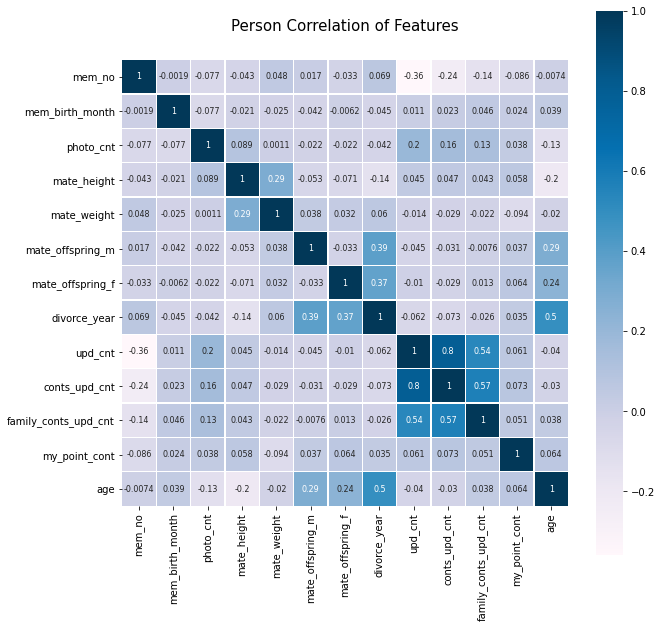

In [40]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 10))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(test_df.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True,
            annot_kws = {"size" : 8})

### `요인성 평가`

`Bartlett 테스트`

In [25]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [43]:
chi_square_value, p_value = calculate_bartlett_sphericity(test_df)
print(chi_square_value, p_value)

2230.7367933409546 0.0


-> p-value가 0으로 탐색적 요인분석에 적합한 데이터

`Kaiser-Meyer-Olkin(KMO)검정`
- 관측 된 각 변수와 전체 모델에 대한 적절성 결정
- KMO로 관측된 모든 변수 간의 분산 비율 추정
- Bartlett과 달리 p 값이 없어서 판단의 기준이 따로 있음
- 0.6 미만 KMO 값은 부적절, 0.8 이상 우수( KMO test는 변수 3개 이상)

In [52]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

In [47]:
kmo_all, kmo_model = calculate_kmo(test_df)
print(kmo_model)

0.6474862599265842


-> KMO 값 0.64으로 무난

In [48]:
test_df.columns

Index(['mem_no', 'mem_birth_month', 'photo_cnt', 'mate_height', 'mate_weight',
       'mate_offspring_m', 'mate_offspring_f', 'divorce_year', 'upd_cnt',
       'conts_upd_cnt', 'family_conts_upd_cnt', 'my_point_cont', 'age'],
      dtype='object')

 요인수 선택

- mem_no
- mem_birth_month, age
- photo_cnt
- mate_height, mate_weigth
- mate_offspring_m, mate_offspring_f, divorce_year
- upd_cnt, conts_upd_cnt, family_conts_upd_cnt
- my_point_cont

In [53]:
fa = FactorAnalyzer(n_factors=7, rotation=None)
fa.fit(test_df)

# Eigen값 체크
ev, v = fa.get_eigenvalues()
ev

array([2.52668746, 1.97830725, 1.30417362, 1.06753067, 1.06133051,
       1.01195109, 0.90152327, 0.84538943, 0.63495625, 0.58292309,
       0.48995643, 0.40347986, 0.19179107])

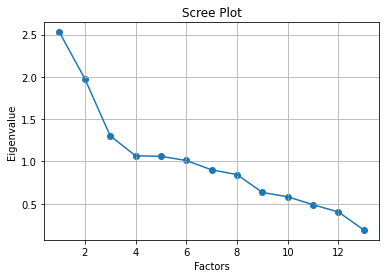

In [54]:
plt.scatter(range(1,test_df.shape[1]+1),ev)
plt.plot(range(1,test_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

-> 4개로 나눠주는게 나은건가? 완만해지는 5?

탐색적 요인분석

In [60]:
fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(test_df)
efa_result = pd.DataFrame(fa.loadings_, index=test_df.columns)
efa_result

,0,1,2,3,4,5
mem_no,-0.305560,0.043283,-0.023786,0.015537,-0.200839,-0.052624
mem_birth_month,0.036745,-0.033320,-0.003843,-0.016237,0.033876,-0.268372
photo_cnt,0.183174,-0.076155,-0.011985,0.040630,0.068803,0.308642
mate_height,0.036979,-0.155763,-0.058176,0.964221,0.182245,0.060094
mate_weight,-0.017527,0.057591,0.037523,0.355495,-0.224660,0.045639
mate_offspring_m,-0.028732,0.527836,-0.114675,0.018005,0.027186,0.077197
mate_offspring_f,0.001077,0.149957,0.984108,-0.001133,0.065193,-0.008155
divorce_year,-0.050957,0.781196,0.259380,0.000107,-0.034712,0.080115
upd_cnt,0.903331,-0.039297,-0.002968,-0.008859,0.061793,0.111668
conts_upd_cnt,0.884405,-0.028711,-0.029557,0.004101,0.016333,0.003714


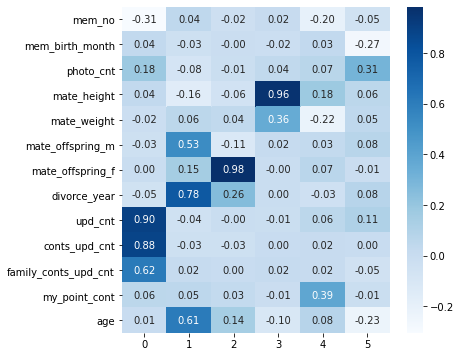

In [61]:
plt.figure(figsize=(6,6))
sns.heatmap(efa_result, cmap='Blues', annot=True, fmt='.2f');

- 요인 0은 upd_cnt, conts_upd_cnt, family_conts_upd_cnt에 높은 요인 적재량을 가짐
- 요인 1은 divorce_year, age, mate_offspring_m에 높은 요인 적재량을 가짐
- 요인 2는 mate_offspring_f에 높은 요인 적재량을 가짐
- 요인 3은 mate_height, mate_weight에 높은 요인 적재량을 가짐
- 요인 4나 5부터는 0.3 이상 보이지 않음

-> 요인 4개로 산정

In [64]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(test_df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=4, rotation='varimax',
        rotation_kwargs={}, svd_method='randomized', use_smc=True)

In [66]:
fa.get_factor_variance()
df1 = pd.DataFrame(fa.get_factor_variance())
df1.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
df1

,0,1,2,3
SS Loadings,2.134764,1.324028,1.078162,0.683750
Proportion Var,0.164213,0.101848,0.082936,0.052596
Cumulative Var,0.164213,0.266061,0.348996,0.401593


- 신뢰도 계수 확인